In [24]:
#importing pandas library
#loading datasets and reading it
import pandas as pd
data = pd.read_excel('FinaleData.xlsx')
data


,Depth,Strain,MC,LL,PL,PI,CU
0,32.70,4.1,17.0,55,27,28,660
1,33.09,3.5,16.0,58,24,34,300
2,41.00,3.2,15.0,42,24,18,740
3,44.87,4.2,15.0,48,24,24,910
4,29.73,18.0,18.0,48,23,25,150
...,...,...,...,...,...,...,...
218,5.40,19.0,20.8,53,21,32,150
219,1.20,15.0,27.7,65,30,35,92
220,3.20,4.9,18.6,57,25,32,260
221,5.20,6.1,21.5,56,25,31,190


In [25]:
data.describe()

,Depth,Strain,MC,LL,PL,PI,CU
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,12.677982,6.850762,18.749327,50.708520,22.744395,27.964126,301.780269
std,10.078863,4.811471,4.643487,8.193068,2.858865,6.221770,351.223449
min,1.200000,0.900000,9.900000,33.000000,16.000000,13.000000,37.000000
25%,5.000000,3.500000,15.400000,44.000000,21.000000,24.000000,110.000000
50%,9.500000,5.500000,18.000000,50.000000,23.000000,28.000000,180.000000
75%,18.805000,8.300000,20.650000,56.500000,25.000000,31.500000,340.000000
max,47.200000,22.000000,34.100000,70.000000,30.000000,45.000000,2400.000000


In [26]:
#input and output features preparation

In [27]:
#X = data.drop(['CU'], axis=1)
#X.shape
#y= data.drop(['Depth', 'Strain', 'MC', 'LL', 'PL', 'PI'], axis=1)
#X.head()
X= data.iloc[:,:6]
y= data.iloc[:,6]
X.head()

,Depth,Strain,MC,LL,PL,PI
0,32.70,4.1,17.0,55,27,28
1,33.09,3.5,16.0,58,24,34
2,41.00,3.2,15.0,42,24,18
3,44.87,4.2,15.0,48,24,24
4,29.73,18.0,18.0,48,23,25


In [28]:
print (X[:10])

   Depth  Strain    MC  LL  PL  PI
0  32.70     4.1  17.0  55  27  28
1  33.09     3.5  16.0  58  24  34
2  41.00     3.2  15.0  42  24  18
3  44.87     4.2  15.0  48  24  24
4  29.73    18.0  18.0  48  23  25
5  32.05     5.1  18.0  51  21  30
6  37.11    19.0  16.0  50  23  27
7  32.85     2.0  15.0  48  20  28
8  23.65     7.8  18.0  46  23  23
9  35.54     2.9  14.0  48  23  25


In [29]:
#splitting the datasets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (X_train)

(178, 6) (45, 6) (178,) (45,)
     Depth  Strain    MC  LL  PL  PI
98    4.95     7.3  19.8  51  20  31
46   12.35    22.0  13.9  38  18  20
41   11.60     5.8  13.0  35  18  17
154   1.50     7.5  34.1  66  26  40
78    3.70     6.6  18.8  52  23  29
..     ...     ...   ...  ..  ..  ..
133   6.20    10.0  19.0  54  25  29
169   1.50     9.4  30.1  64  29  35
67    4.20    18.0  16.0  43  21  22
27    1.20    20.0  22.0  34  18  16
134   8.70     7.5  19.0  58  28  30

[178 rows x 6 columns]


In [31]:
# decision tree regression model
#import the regressor
from sklearn.tree import DecisionTreeRegressor

In [32]:
#creating and fitting the model
themodel= DecisionTreeRegressor().fit(X_train, y_train)

In [33]:
#the coeeficient of determination
print('The training r_sq is:%.2f'%themodel.score(X_train, y_train))

The training r_sq is:1.00


In [34]:
# Training model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [35]:
# Prediction on the training datasets
ytrain_pred= themodel.predict(X_train)
# The r_sq
print('The r_sq is:',r2_score(y_train, ytrain_pred))

The r_sq is: 1.0


In [36]:
# The MAE
print('The MAE is:', mean_absolute_error(y_train, ytrain_pred))

The MAE is: 0.0


In [37]:
# The MSE 
print('The MSE is:', mean_squared_error(y_train, ytrain_pred))

The MSE is: 0.0


In [38]:
# The RMSE
import numpy as np
print('The RMSE is:', np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RMSE is: 0.0


In [39]:
#The EVS
print('The EVS is:',explained_variance_score(y_train, ytrain_pred))

The EVS is: 1.0


In [40]:
# prediction on the testing data
ytest_pred= themodel.predict(X_test)
neva = themodel.predict([[32, 4, 17, 55, 27, 28]])
neva

c:\Users\PC\projects\Capstone_proj - Copy\flask_api\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([660.])

In [41]:
# The coefficeint of determination
# The r_sq
print('The testing r_sq is %.2f'% r2_score(y_test, ytest_pred))

The testing r_sq is 0.67


In [42]:
# plotting the observed and predicted lake level
import matplotlib.pyplot as plt
# Setting the boundaries and the parameters
plt.rcParams['figure.figsize']= (10, 6)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label = 'Observed', color= 'k', linestyle= '-')
plt.plot(x_ax, ytest_pred, label='Predicted', color='k', linestyle='--')
plt.ylabel('CU (Kpa)')
plt.xlabel=('Testing sample data')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc= 'lower center', frameon= False, ncol=2)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#Plotting the prediction errors and residuals

c:\Users\ntebe\projects\Capstone_proj\flask_api\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


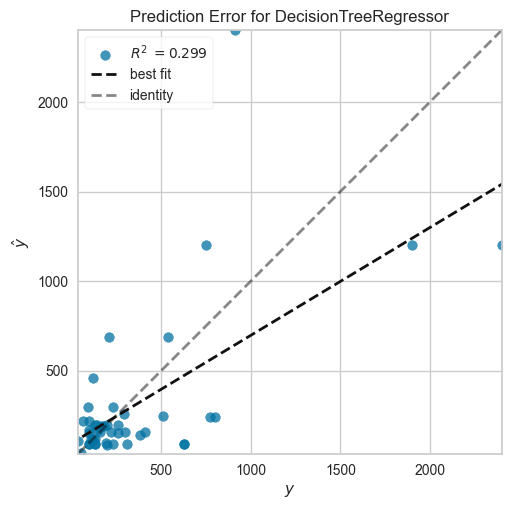

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
#Prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(themodel)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

c:\Users\ntebe\projects\Capstone_proj\flask_api\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


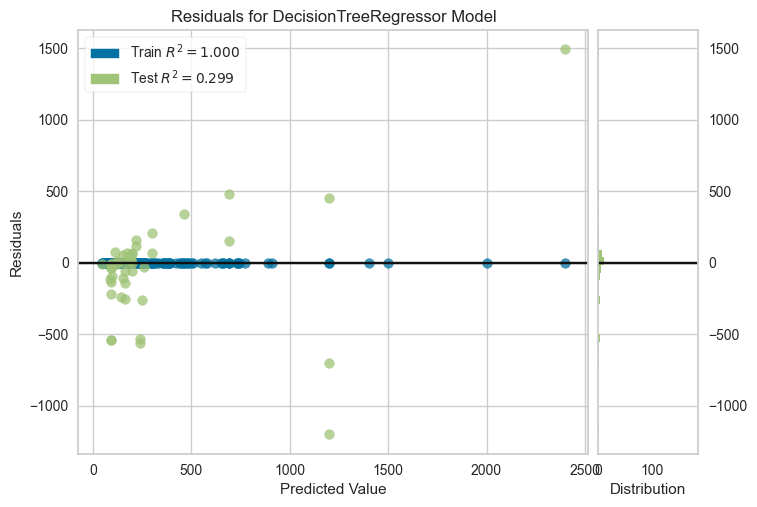

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#Residual plots
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(themodel)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [ ]:
#Testing model evaluation

In [ ]:
#the MER
print('The MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))

The MAE is: 216.58


In [ ]:
#The MSE
print('The MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

The MSE is: 140569.42


In [ ]:
print('The RMSE is: %.2f'%np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE is: 374.93


In [ ]:
#The ESV
print('The ESV is: %.2f'% explained_variance_score(y_test, ytest_pred))

The ESV is: 0.31


In [ ]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
# On the training dataset
score_train = cross_val_score(themodel,X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10) 

In [ ]:
score_train

array([ -12013.11111111,  -43677.44444444,  -93964.55555556,
         -8994.22222222,  -12002.05555556,  -36747.05555556,
       -150289.83333333,  -99057.27777778,  -19168.11764706,
        -40921.        ])

In [ ]:
score_train = np.mean(score_train)
score_train


-51683.46732026144

In [ ]:
# To make it positive

In [ ]:
from numpy import absolute
score_train = absolute(score_train)
score_train

51683.46732026144

In [ ]:
#CV on the testing data
score_test = cross_val_score(themodel, X_test, y_test, scoring= 'neg_mean_squared_error', cv=10)
score_test

array([ -16860.  ,   -3519.2 ,  -32060.  ,  -51000.  ,  -66500.4 ,
       -311625.  ,  -40450.  ,  -63825.  ,  -11975.  ,  -65701.25])

In [ ]:
# The mean score
score_test = absolute(np.mean(score_test))
score_test

66351.58499999999

c:\Users\ntebe\projects\Capstone_proj\flask_api\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntebe\projects\Capstone_proj\flask_api\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


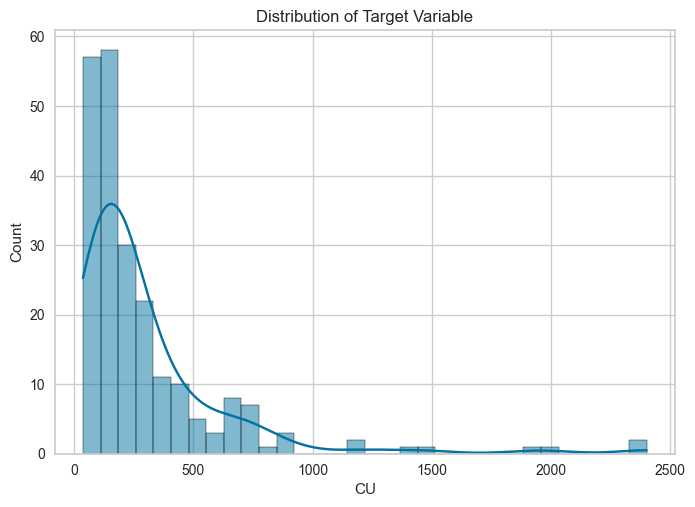

In [ ]:
import seaborn as sns
sns.histplot(data['CU'], kde=True) # replace 'target_variable' with your target column
plt.title('Distribution of Target Variable')
plt.show()

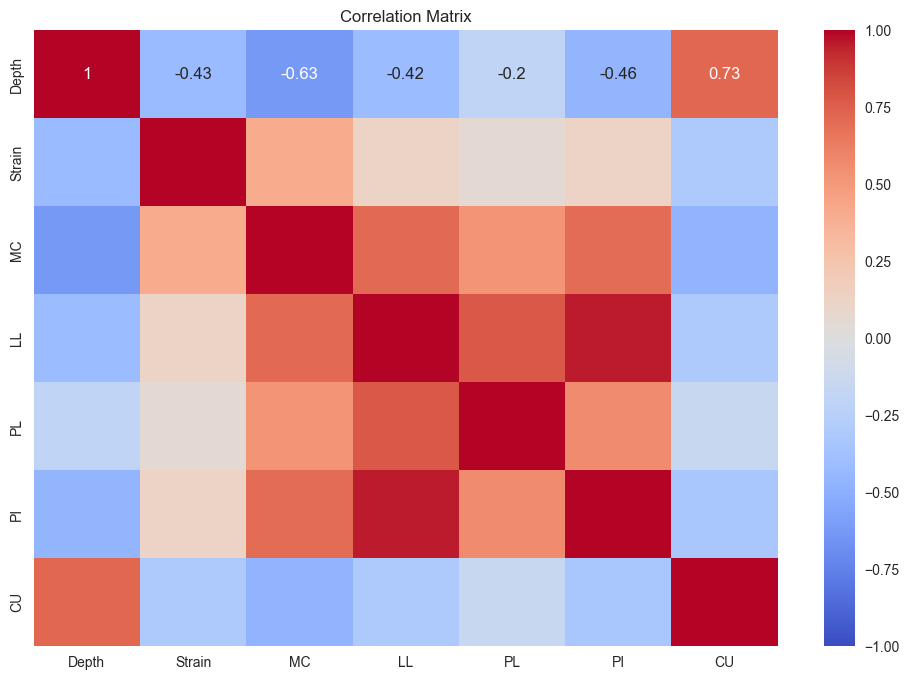

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Define and train the regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)  # assuming X_train and y_train are already defined

# Save the trained model
#import pickle
#with open('themodel.pkl', 'wb') as f:
    #pickle.dump(regressor, f)


DecisionTreeRegressor()

In [ ]:
#import pickle

#with open('themodel.pkl', 'wb') as f:
    #pickle.dump(regressor, f)

In [ ]:
#import pickle

#with open('themodel.pkl', 'wb') as file:
    #pickle.dump(tree_reg, file)


In [ ]:
import pickle

# Specify the filename
filename = 'decision_tree_model.pkl'

# Save the trained model as a pickle string
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)


In [ ]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
#np.predict(32.7, 4.1, 17, 55, 27, 28)

In [ ]:
import numpy as np
new_data = np.array([[32.7, 4.1, 17, 55, 27, 28]])  # Replace with your actual feature values
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction[0])




Prediction: 660.0


c:\Users\ntebe\projects\Capstone_proj\flask_api\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
